<b>Шаг 1.</b> Откройте файл с данными и изучите общую информацию

In [437]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('5000 Sales Records.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          5000 non-null   object 
 1   Country         5000 non-null   object 
 2   Item Type       5000 non-null   object 
 3   Sales Channel   5000 non-null   object 
 4   Order Priority  5000 non-null   object 
 5   Order Date      5000 non-null   object 
 6   Order ID        5000 non-null   int64  
 7   Ship Date       5000 non-null   object 
 8   Units Sold      5000 non-null   int64  
 9   Unit Price      5000 non-null   float64
 10  Unit Cost       5000 non-null   float64
 11  Total Revenue   5000 non-null   float64
 12  Total Cost      5000 non-null   float64
 13  Total Profit    5000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 547.0+ KB


<b>Шаг 2.</b> Подготовка данных

<li>Замена названий столбцов

In [438]:
df.columns = df.columns.str.lower()
df.columns

Index(['region', 'country', 'item type', 'sales channel', 'order priority',
       'order date', 'order id', 'ship date', 'units sold', 'unit price',
       'unit cost', 'total revenue', 'total cost', 'total profit'],
      dtype='object')

<li>Преобразвание данных в нужные типы

In [439]:
df['order date'] = pd.to_datetime(df['order date'])
df['ship date'] = pd.to_datetime(df['ship date'])
df.head(10)

,region,country,item type,sales channel,order priority,order date,order id,ship date,units sold,unit price,unit cost,total revenue,total cost,total profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544,2014-01-11,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504,2010-07-26,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952,2010-06-15,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596,2015-07-27,7542,152.58,97.44,1150758.36,734892.48,415865.88
5,Middle East and North Africa,Morocco,Personal Care,Offline,L,2010-11-08,412882792,2010-11-22,48,81.73,56.67,3923.04,2720.16,1202.88
6,Australia and Oceania,Federated States of Micronesia,Clothes,Offline,H,2011-03-28,932776868,2011-05-10,8258,109.28,35.84,902434.24,295966.72,606467.52
7,Europe,Bosnia and Herzegovina,Clothes,Online,M,2013-10-14,919133651,2013-11-04,927,109.28,35.84,101302.56,33223.68,68078.88
8,Middle East and North Africa,Afghanistan,Clothes,Offline,M,2016-08-27,579814469,2016-10-05,8841,109.28,35.84,966144.48,316861.44,649283.04
9,Sub-Saharan Africa,Ethiopia,Baby Food,Online,M,2015-04-13,192993152,2015-05-07,9817,255.28,159.42,2506083.76,1565026.14,941057.62


Изменил 'order date' и 'ship date'. Теперь они переведены в datetime для корректного отображения.

<li>Обработайте пропуски при необходимости

Пропусков нет. Следовательно, и обрабатывать их незачем.

<li>Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [440]:
df['total_profit_by_region'] = df.groupby('region')['total profit'].transform('sum')
df.head(10)

,region,country,item type,sales channel,order priority,order date,order id,ship date,units sold,unit price,unit cost,total revenue,total cost,total profit,total_profit_by_region
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544,2014-01-11,552,255.28,159.42,140914.56,87999.84,52914.72,2.046120e+08
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504,2010-07-26,2167,152.58,97.44,330640.86,211152.48,119488.38,2.046120e+08
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,31.79,226716.10,151892.62,74823.48,5.016760e+08
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952,2010-06-15,9016,205.70,117.11,1854591.20,1055863.76,798727.44,2.782377e+08
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596,2015-07-27,7542,152.58,97.44,1150758.36,734892.48,415865.88,2.782377e+08
5,Middle East and North Africa,Morocco,Personal Care,Offline,L,2010-11-08,412882792,2010-11-22,48,81.73,56.67,3923.04,2720.16,1202.88,2.313803e+08
6,Australia and Oceania,Federated States of Micronesia,Clothes,Offline,H,2011-03-28,932776868,2011-05-10,8258,109.28,35.84,902434.24,295966.72,606467.52,1.749346e+08
7,Europe,Bosnia and Herzegovina,Clothes,Online,M,2013-10-14,919133651,2013-11-04,927,109.28,35.84,101302.56,33223.68,68078.88,5.016760e+08
8,Middle East and North Africa,Afghanistan,Clothes,Offline,M,2016-08-27,579814469,2016-10-05,8841,109.28,35.84,966144.48,316861.44,649283.04,2.313803e+08
9,Sub-Saharan Africa,Ethiopia,Baby Food,Online,M,2015-04-13,192993152,2015-05-07,9817,255.28,159.42,2506083.76,1565026.14,941057.62,5.311423e+08


<b>Шаг 3.1. Проведите исследовательский анализ данных для регионов</b>

<li>Выявите регион с самым большим и самым маленьким Total Cost, Total Revenue,
Total Profit

In [441]:
df.groupby('region').agg({'total cost': 'sum', 'total revenue': 'sum', 'total profit': 'sum',}).sort_values(by=['total cost', 'total revenue', 'total profit'], ascending=False)

,total cost,total revenue,total profit
region,,,
Sub-Saharan Africa,1.283425e+09,1.814567e+09,5.311423e+08
Europe,1.201946e+09,1.703622e+09,5.016760e+08
Asia,6.420394e+08,9.202771e+08,2.782377e+08
Middle East and North Africa,5.354875e+08,7.668678e+08,2.313803e+08
Central America and the Caribbean,4.803643e+08,6.849763e+08,2.046120e+08
Australia and Oceania,4.124295e+08,5.873641e+08,1.749346e+08
North America,1.097739e+08,1.510143e+08,4.124040e+07


Можно сделать вывод,что Sub-Saharan Africa является регионом с самой высокой доходностью, а North America - с самой низкой

<li>Выявите регион с самым большим и самым маленьким Units Sold, Unit Price, Unit
Cost

In [442]:
df.groupby('region').agg({'units sold': 'sum', 'unit price': 'sum', 'unit cost': 'sum',}).sort_values(by=['units sold', 'unit price', 'unit cost'], ascending=False)

,units sold,unit price,unit cost
region,,,
Sub-Saharan Africa,6642380,349025.54,246882.89
Europe,6582322,352308.41,249038.26
Asia,3620036,183556.72,128579.21
Middle East and North Africa,3013431,157454.57,110155.63
Central America and the Caribbean,2698776,138441.97,97945.33
Australia and Oceania,2111786,116833.27,82580.72
North America,484760,31107.34,22288.68


Можно сделать вывод, что Sub-Saharan Africa является регионом с cамыми высокими продажами, а North America - с самыми низкими

<li>Постройте зависмость региона от типа продаж (онлайн-оффлайн)

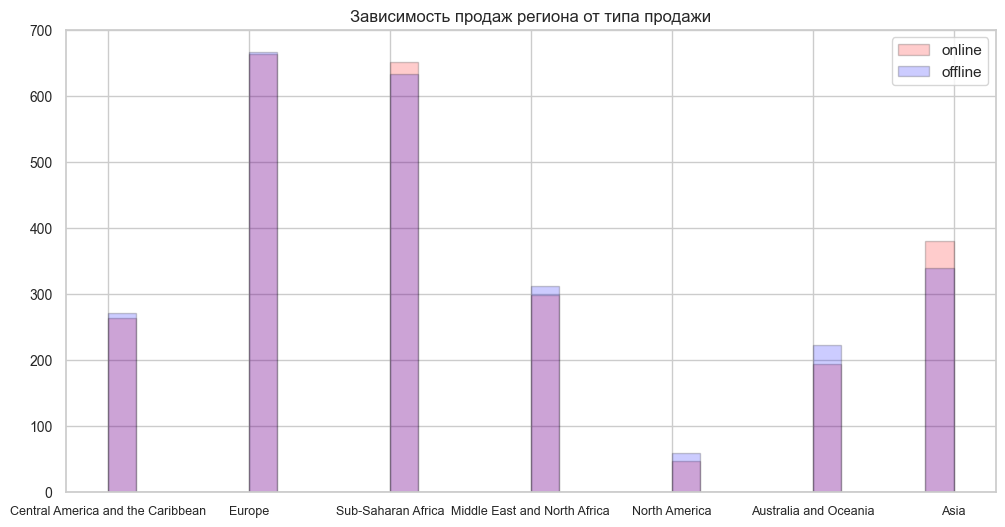

In [443]:
online = df[df['sales channel'] == 'Online']
offline = df[df['sales channel'] == 'Offline']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.hist(online['region'], color='red', alpha=0.2, edgecolor='black', linewidth=1, label='online', align='mid', bins=30)
plt.hist(offline['region'], color='blue', alpha=0.2, edgecolor='black', linewidth=1, label='offline', align='mid', bins=30)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.title('Зависимость продаж региона от типа продажи')
plt.legend()
plt.show()

В Central America and the Caribbean	и Europe продажи примерно одинаковые, в Sub-Saharan Africa и Asia немного лидируют онлайн-продажи, в Middle East and North Africa, North Africa и Australia and Oceania - лидируют оффлайн-продажи

<li>Разделите таблицу по Item Type — продовольственные и не продовольственные
товары

Для начала узнаем, какие товары есть в таблице

In [444]:
items = df['item type'].unique()
for i in range(len(items)): print(f"{i+1}.{items[i]}") 

1.Baby Food
2.Snacks
3.Beverages
4.Cereal
5.Personal Care
6.Clothes
7.Office Supplies
8.Cosmetics
9.Meat
10.Fruits
11.Vegetables
12.Household


Разделяем таблицу по item type

In [445]:
food = ['Baby Food', 'Snacks', 'Beverages', 'Cereal', 'Meat', 'Fruits', 'Vegetables']
df['food or non-food'] = df['item type']
for column, series in df.items():
    if column == 'food or non-food':
        for i in range(len(series)):
            if df.loc[i, column] in food:
                df.loc[i, column] = 'food'
            else:
                df.loc[i, column] = 'not food'

df.head(10)

,region,country,item type,sales channel,order priority,order date,order id,ship date,units sold,unit price,unit cost,total revenue,total cost,total profit,total_profit_by_region,food or non-food
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544,2014-01-11,552,255.28,159.42,140914.56,87999.84,52914.72,2.046120e+08,food
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504,2010-07-26,2167,152.58,97.44,330640.86,211152.48,119488.38,2.046120e+08,food
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,31.79,226716.10,151892.62,74823.48,5.016760e+08,food
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952,2010-06-15,9016,205.70,117.11,1854591.20,1055863.76,798727.44,2.782377e+08,food
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596,2015-07-27,7542,152.58,97.44,1150758.36,734892.48,415865.88,2.782377e+08,food
5,Middle East and North Africa,Morocco,Personal Care,Offline,L,2010-11-08,412882792,2010-11-22,48,81.73,56.67,3923.04,2720.16,1202.88,2.313803e+08,not food
6,Australia and Oceania,Federated States of Micronesia,Clothes,Offline,H,2011-03-28,932776868,2011-05-10,8258,109.28,35.84,902434.24,295966.72,606467.52,1.749346e+08,not food
7,Europe,Bosnia and Herzegovina,Clothes,Online,M,2013-10-14,919133651,2013-11-04,927,109.28,35.84,101302.56,33223.68,68078.88,5.016760e+08,not food
8,Middle East and North Africa,Afghanistan,Clothes,Offline,M,2016-08-27,579814469,2016-10-05,8841,109.28,35.84,966144.48,316861.44,649283.04,2.313803e+08,not food
9,Sub-Saharan Africa,Ethiopia,Baby Food,Online,M,2015-04-13,192993152,2015-05-07,9817,255.28,159.42,2506083.76,1565026.14,941057.62,5.311423e+08,food


<li>Постройте гистограмму по доходу от продаж по типам товаров в зависмости от типа
продажи (2 графика)

1 график (онлайн-продажи)

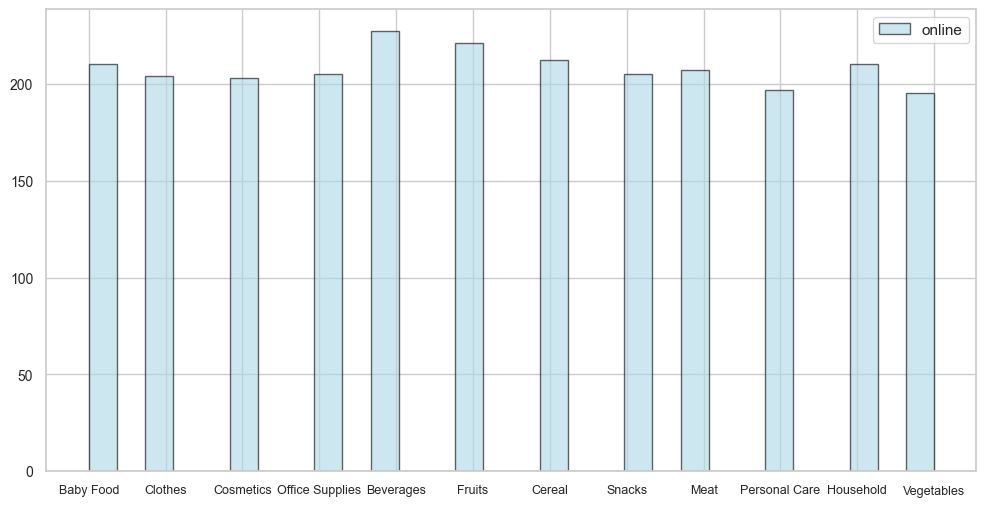

In [446]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.hist(online['item type'], color='lightblue', alpha=0.6, edgecolor='black', linewidth=1, label='online', align='mid', bins=30)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

2 график(оффлайн-продажи)

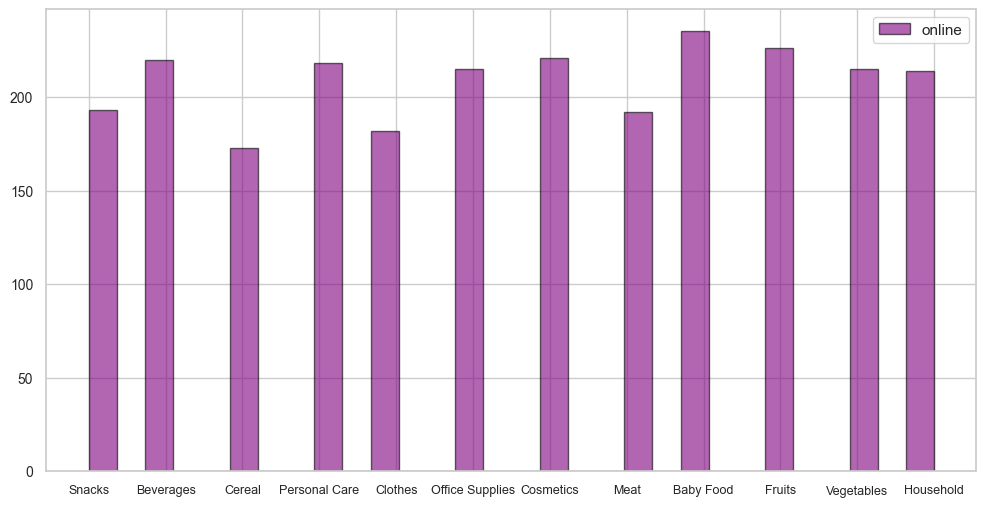

In [447]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.hist(offline['item type'], color='purple', alpha=0.6, edgecolor='black', linewidth=1, label='online', align='mid', bins=30)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

<li>Просуммируйте данные по Total Profit по годам и постройте гисторгамму по региону в
зависмости от года

C:\Users\n0ves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(66.63798394097222, 0.5, 'total profit')

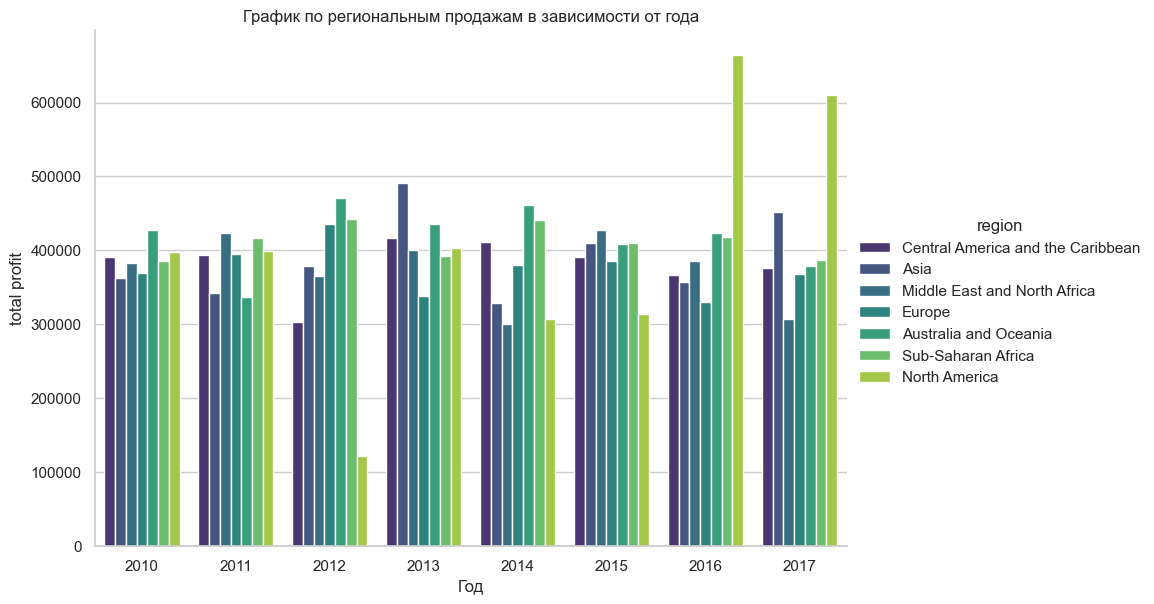

In [448]:
df['year'] = df['order date'].dt.year
grouped_data = df.groupby(['year', 'region'])['total profit'].sum().reset_index()

sns.catplot(x='year', y='total profit', hue='region', kind='bar', data=df, height=6, aspect=1.5, palette='viridis', errorbar=None)
plt.title('График по региональным продажам в зависимости от года')
plt.xlabel('Год')
plt.ylabel('total profit')

<li>Зависмость длинтельности срока отгрузки от региона, график

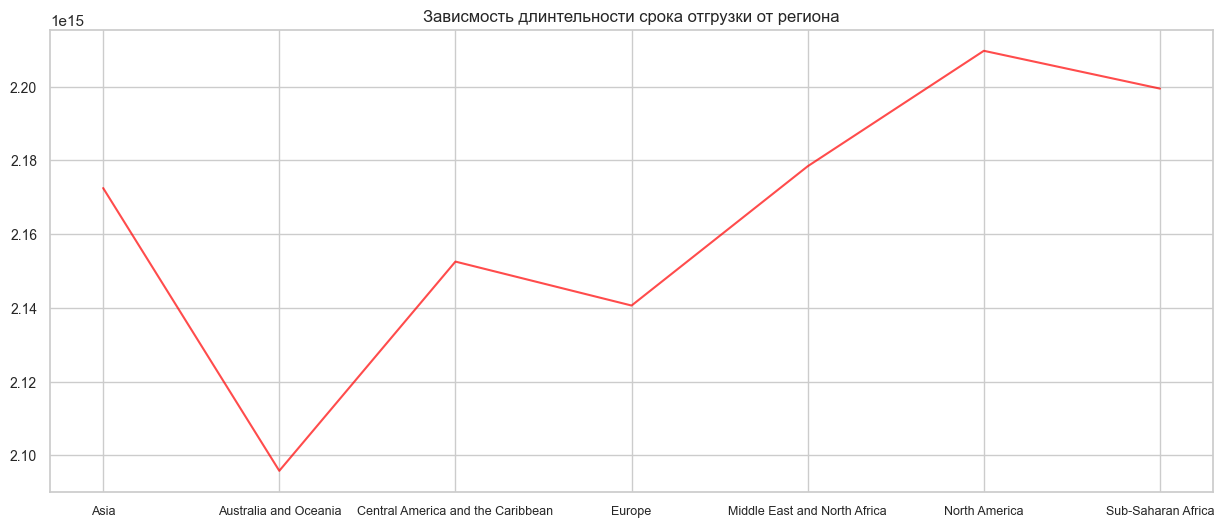

In [449]:
df['duration'] = df['ship date'] - df['order date']
avg = df.groupby('region')['duration'].mean()
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
plt.title('Зависмость длинтельности срока отгрузки от региона')
plt.plot(avg, color='red', alpha=0.7)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.show()

<li>Средний срок отгрузки по региону

In [450]:
avg.to_frame()

,duration
region,
Asia,25 days 03:28:17.357440890
Australia and Oceania,24 days 06:10:23.076923077
Central America and the Caribbean,24 days 21:55:57.303370786
Europe,24 days 18:37:21.203007518
Middle East and North Africa,25 days 05:06:53.114754098
North America,25 days 13:48:40.754716981
Sub-Saharan Africa,25 days 10:57:48.326848249


<li>Гистограмма распеределения количества заказов от Order Priority

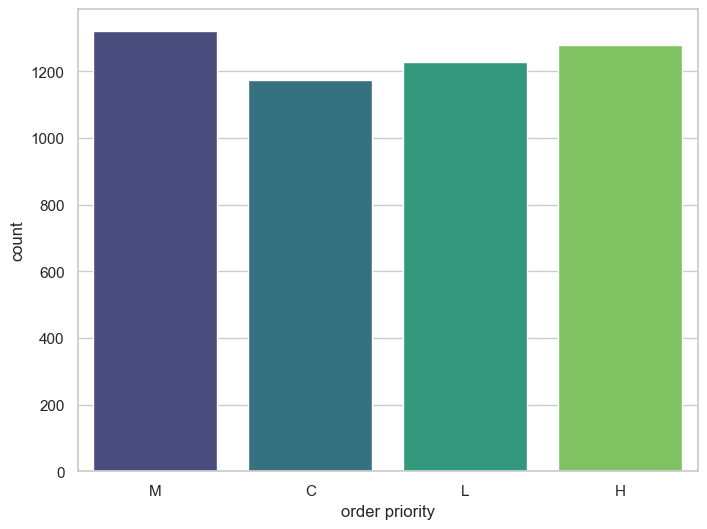

In [451]:
plt.figure(figsize=(8, 6))
sns.countplot(x='order priority', data=df, palette='viridis', dodge=False, legend=False, hue='order priority')
plt.show()

<b>Шаг 3.2. Выбретие любой регион и пранализируйте данные по п 1-8 по странам этого регионам</b> 

Я выберу регион Europe

<li>Выявляю страну с самым большим и самым маленьким Total Cost, Total Revenue,
Total Profit

In [452]:
europe = df[df['region'] == 'Europe']

europe.groupby('country').agg({'total cost': 'sum', 'total revenue': 'sum', 'total profit': 'sum',}).sort_values(by=['total cost', 'total revenue', 'total profit'], ascending=False)

,total cost,total revenue,total profit
country,,,
Czech Republic,39908338.36,53543932.14,13635593.78
Kosovo,39423997.34,53833142.79,14409145.45
Ukraine,38447391.80,53252317.54,14804925.74
Bosnia and Herzegovina,36859905.72,50117508.49,13257602.77
Portugal,35826782.25,47172189.84,11345407.59
Macedonia,35537985.30,49222085.25,13684099.95
San Marino,34090715.67,47883708.48,13792992.81
Russia,32783977.17,46051659.81,13267682.64
Malta,32535192.93,47145320.81,14610127.88


Можно сделать вывод,что Czech Republic является регионом с самой высокой доходностью, а Monaco - с самой низкой

<li>Выявляю страну с самым большим и самым маленьким Units Sold, Unit Price, Unit
Cost

In [453]:
europe.groupby('country').agg({'units sold': 'sum', 'unit price': 'sum', 'unit cost': 'sum',}).sort_values(by=['units sold', 'unit price', 'unit cost'], ascending=False)

,units sold,unit price,unit cost
country,,,
Macedonia,203078,8317.34,5995.33
San Marino,192228,10194.71,7157.86
Andorra,185686,9774.25,6724.50
Kosovo,177589,11333.77,8342.44
Greece,176859,7774.34,5450.20
Malta,173641,8379.80,5810.52
Serbia,170369,6721.01,4723.92
Romania,166882,7314.62,5317.08
Russia,165954,8497.93,5900.22


Можно сделать вывод,что Macedonia является регионом с самыми высокими продажами, а Monaco - с самыми низкими

<li>Постройте зависмость региона от типа продаж (онлайн-оффлайн)

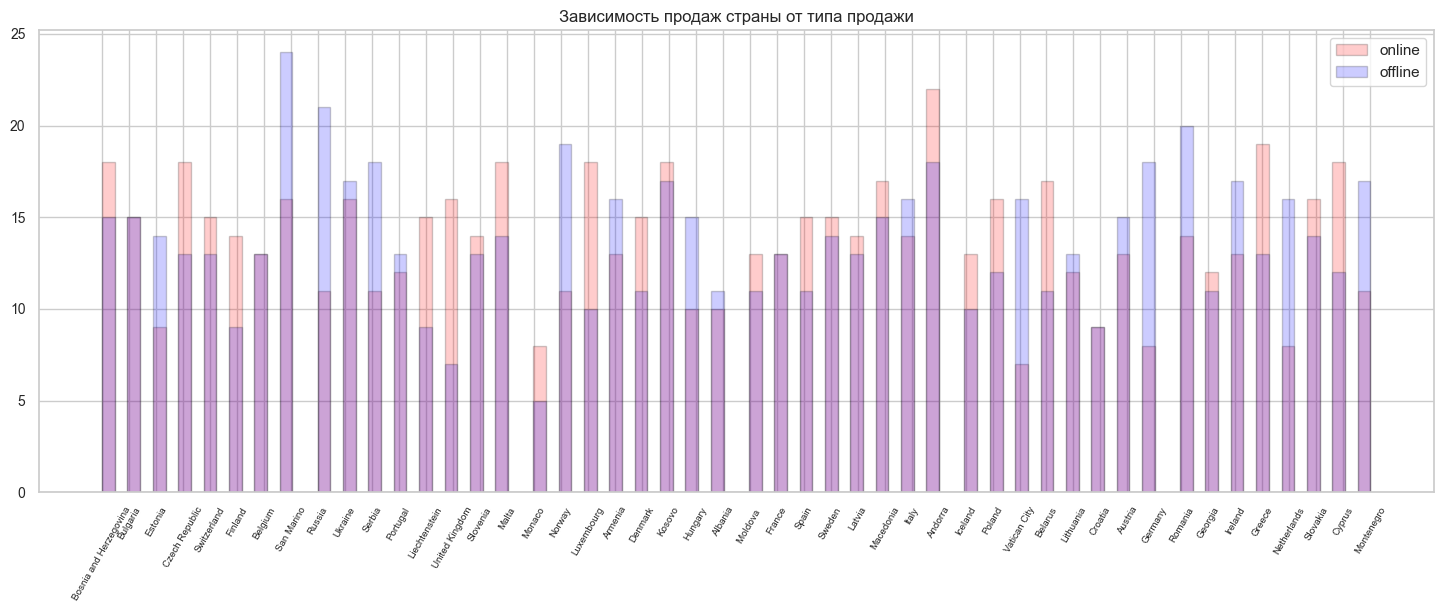

In [454]:
online = europe[europe['sales channel'] == 'Online']
offline = europe[europe['sales channel'] == 'Offline']


sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))
plt.hist(online['country'], color='red', alpha=0.2, edgecolor='black', linewidth=1, label='online', align='mid', bins=100)
plt.hist(offline['country'], color='blue', alpha=0.2, edgecolor='black', linewidth=1, label='offline', align='mid', bins=100)
plt.xticks(fontsize=7, rotation=60)
plt.yticks(fontsize=10)
plt.title('Зависимость продаж страны от типа продажи')
plt.legend()
plt.show()

<li>Разделите таблицу по Item Type — продовольственные и не продовольственные
товары

In [455]:
for column, series in europe.items():
    if column == 'food or non-food':
        for i in range(len(series)):
            if df.loc[i, column] in food:
                df.loc[i, column] = 'food'
            else:
                df.loc[i, column] = 'not food'

europe.head(10)

,region,country,item type,sales channel,order priority,order date,order id,ship date,units sold,unit price,unit cost,total revenue,total cost,total profit,total_profit_by_region,food or non-food,year,duration
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,31.79,226716.10,151892.62,74823.48,5.016760e+08,food,2011,17 days
7,Europe,Bosnia and Herzegovina,Clothes,Online,M,2013-10-14,919133651,2013-11-04,927,109.28,35.84,101302.56,33223.68,68078.88,5.016760e+08,not food,2013,21 days
16,Europe,Austria,Cereal,Offline,C,2014-08-13,987410676,2014-09-06,5616,205.70,117.11,1155211.20,657689.76,497521.44,5.016760e+08,food,2014,24 days
17,Europe,Bulgaria,Office Supplies,Online,L,2010-10-31,672330081,2010-11-29,6266,651.21,524.96,4080481.86,3289399.36,791082.50,5.016760e+08,not food,2010,29 days
22,Europe,Estonia,Fruits,Online,L,2016-09-28,579463422,2016-11-01,4958,9.33,6.92,46258.14,34309.36,11948.78,5.016760e+08,food,2016,34 days
26,Europe,Montenegro,Fruits,Offline,L,2016-05-29,313705861,2016-07-10,1390,9.33,6.92,12968.70,9618.80,3349.90,5.016760e+08,food,2016,42 days
35,Europe,Czech Republic,Cereal,Online,M,2011-07-08,552037513,2011-08-05,9022,205.70,117.11,1855825.40,1056566.42,799258.98,5.016760e+08,food,2011,28 days
37,Europe,Luxembourg,Vegetables,Offline,L,2010-02-13,744683635,2010-04-01,7291,154.06,90.93,1123251.46,662970.63,460280.83,5.016760e+08,food,2010,47 days
40,Europe,Switzerland,Meat,Online,L,2014-03-21,169378983,2014-04-10,1860,421.89,364.69,784715.40,678323.40,106392.00,5.016760e+08,food,2014,20 days
48,Europe,Finland,Beverages,Online,H,2012-03-16,566428315,2012-03-23,7581,47.45,31.79,359718.45,240999.99,118718.46,5.016760e+08,food,2012,7 days


<li>Постройте гистограмму по доходу от продаж по типам товаров в зависмости от типа
продажи (2 графика)

1 график (онлайн-продажи)

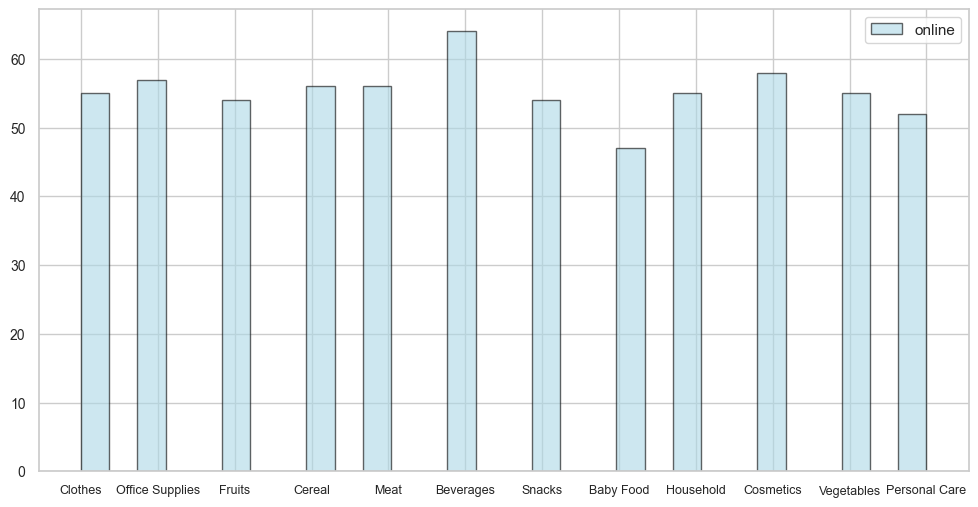

In [456]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.hist(online['item type'], color='lightblue', alpha=0.6, edgecolor='black', linewidth=1, label='online', align='mid', bins=30)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

2 график(оффлайн-продажи)

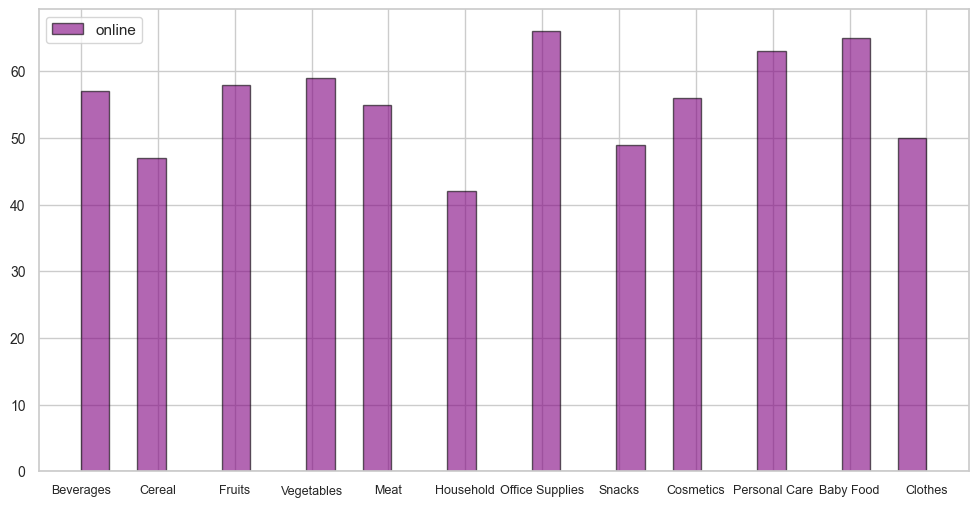

In [457]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.hist(offline['item type'], color='purple', alpha=0.6, edgecolor='black', linewidth=1, label='online', align='mid', bins=30)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

<li>Просуммируйте данные по Total Profit по годам и постройте гисторгамму по стране в
зависмости от года

C:\Users\n0ves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


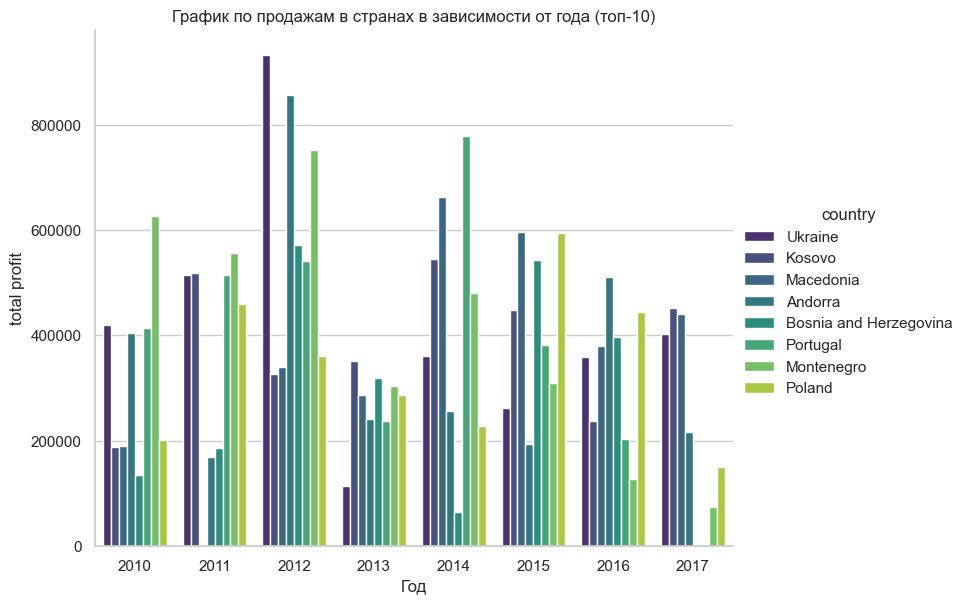

In [458]:
grouped_data = europe.groupby(['year', 'country'])['total profit'].sum().reset_index()
top_10 = grouped_data.nlargest(10, 'total profit')['country']
sns.catplot(x='year', y='total profit', hue='country', kind='bar', data=df[df['country'].isin(top_10)], height=6, aspect=1.3, palette='viridis', errorbar=None)
plt.title('График по продажам в странах в зависимости от года (топ-10)')
plt.xlabel('Год')
plt.ylabel('total profit')
plt.show()

<li>Зависмость длинтельности срока отгрузки от страны, график

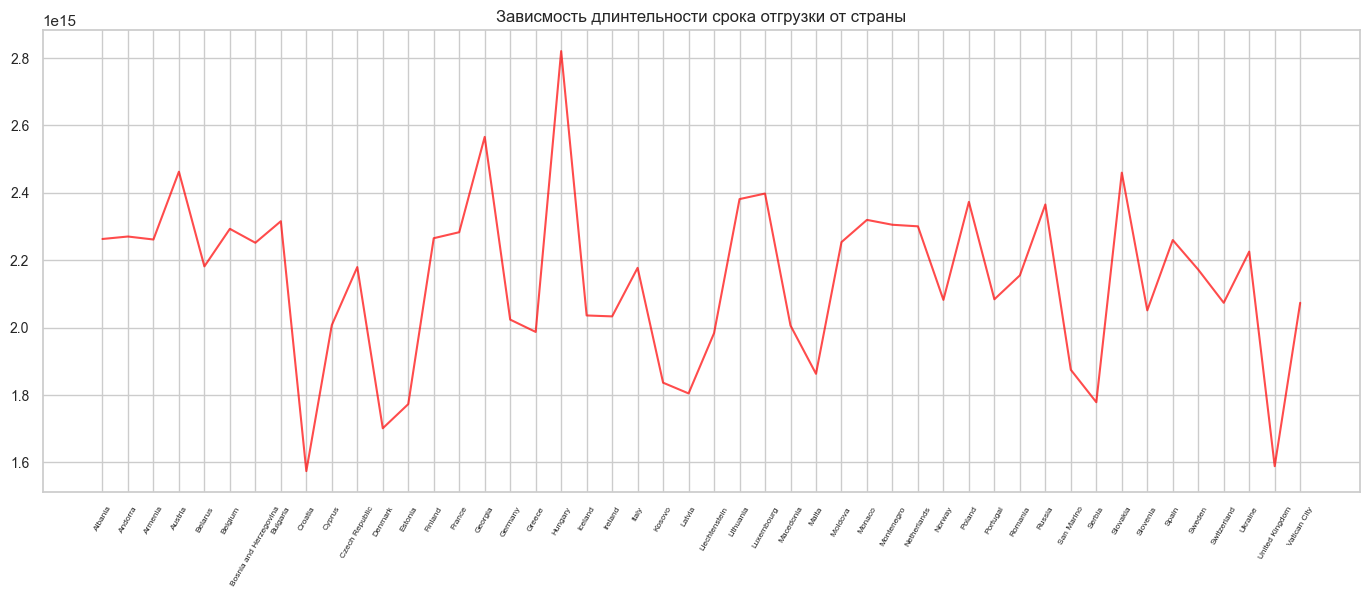

In [459]:
europe['duration'] = europe['ship date'] - europe['order date']
avg = europe.groupby('country')['duration'].mean()
sns.set(style="whitegrid")
plt.figure(figsize=(17, 6))
plt.title('Зависмость длинтельности срока отгрузки от страны')
plt.plot(avg, color='red', alpha=0.7)
plt.xticks(fontsize=6, rotation=60)
plt.yticks(fontsize=10)
plt.show()

<li>Средний срок отгрузки по стране

In [460]:
avg.to_frame()

,duration
country,
Albania,26 days 04:34:17.142857143
Andorra,26 days 06:36:00
Armenia,26 days 04:08:16.551724138
Austria,28 days 12:00:00
Belarus,25 days 06:00:00
Belgium,26 days 12:55:23.076923077
Bosnia and Herzegovina,26 days 01:27:16.363636363
Bulgaria,26 days 19:12:00
Croatia,18 days 05:20:00


<li>Гистограмма распеределения количества заказов от Order Priority

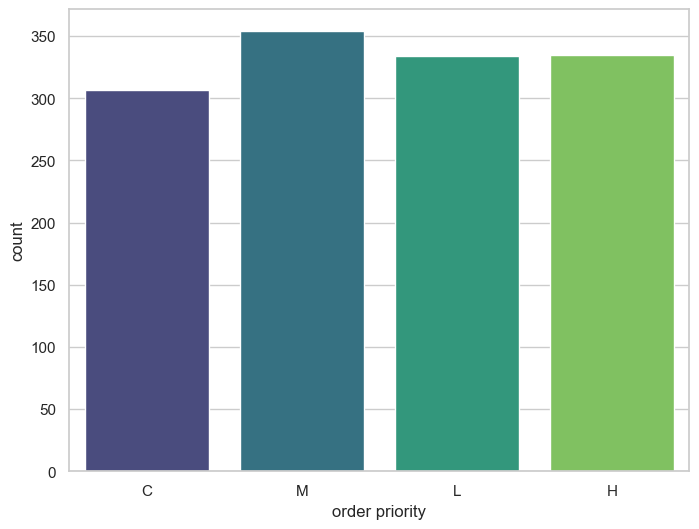

In [461]:
plt.figure(figsize=(8, 6))
sns.countplot(x='order priority', data=europe, palette='viridis', dodge=False, legend=False, hue='order priority')
plt.show()

<b>Шаг 4. Вывод:</b>

Выполнено преобразование данных в нужные типы, посчитаны суммарные продажи во всех регионах, выявил лидирующий и отстающий регионы по продажам. Построил графики, чтобы визуализировать продажи по регионам, также их зависимости от длительности срока отгрузки от региона. То же самое проделал с отдельным регионом, Европой 